In [42]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#  Import SK-Learn Library
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report
from sklearn.preprocessing import StandardScaler

In [46]:
target_url = (r"A:\launch_code_STL\Final_Homework\week-17\abalone.data")

In [47]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pd.read_csv(target_url, names=column_names)
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [48]:
# checking for statistics of the dataset
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [49]:
data[data.height == 0]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [50]:
abalone_df = data[data.height != 0]
abalone_df.describe()
abalone_df['height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: height, dtype: float64

<AxesSubplot:>

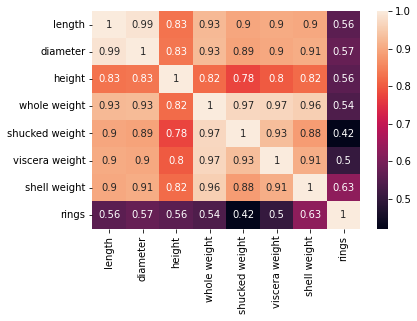

In [51]:
# checking for the correlation of the dataset
abalone_df.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(abalone_df.corr(), annot = True)

In [59]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4175 non-null   object 
 1   length          4175 non-null   float64
 2   diameter        4175 non-null   float64
 3   height          4175 non-null   float64
 4   whole weight    4175 non-null   float64
 5   shucked weight  4175 non-null   float64
 6   viscera weight  4175 non-null   float64
 7   shell weight    4175 non-null   float64
 8   rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

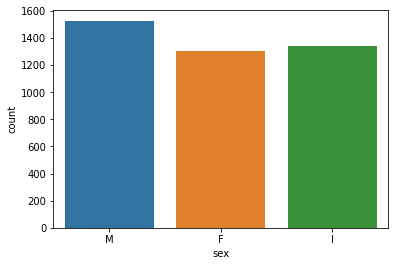

In [61]:
#we have one categorical variable. ('Sex')
#plotting to check how many categories for 'Sex' variable
sns.countplot(abalone_df.sex)

In [64]:
# Label Encoding
# dummy columns are created for the categories in Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_df['sex'] = le.fit_transform(abalone_df.sex)
 #the dummy columns are included in df now

C:\Users\rsagu\AppData\Local\Temp/ipykernel_35080/683900852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_df['sex'] = le.fit_transform(abalone_df.sex)


C:\Users\rsagu\AppData\Local\Temp/ipykernel_35080/4291467375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_df['age'] = abalone_df.rings + 1.5
C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

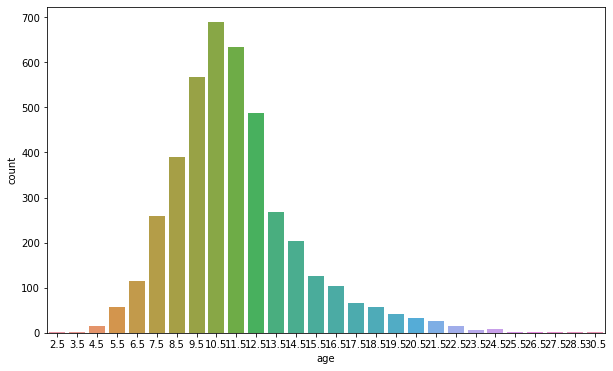

In [66]:
# #as per description age = number of rings + 1.5
abalone_df['age'] = abalone_df.rings + 1.5
abalone_df['age'].describe()
#lets check the age plot
plt.figure(4, figsize=(10, 6))
sns.countplot(abalone_df['age'])

C:\Users\rsagu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeIndex', ylabel='count'>

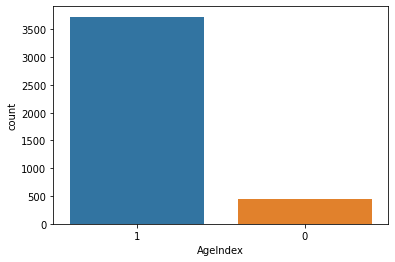

In [67]:
AgeValues = abalone_df['age'].values
AgeIndex = []
# 0 is young, 1 is old
for age in AgeValues:
    if age <8:
        AgeIndex.append('0')
    else:
        AgeIndex.append('1')

AgeIndex = pd.DataFrame(data = AgeIndex, columns = ['AgeIndex'])
abalone_df.reset_index(drop=True, inplace=True)
AgeIndex.reset_index(drop = True, inplace = True)
newDf = pd.concat([abalone_df, AgeIndex], axis = 1)

plt.figure(5)
sns.countplot(newDf['AgeIndex'])

In [68]:

# for more complicated cases use sklearn.feature_extraction.DictVectorizer
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

KeyError: 'sex'

In [53]:
y = data.rings.values

In [54]:
del data["rings"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = data.values.astype(np.float)

C:\Users\rsagu\AppData\Local\Temp/ipykernel_35080/4135979514.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.values.astype(np.float)


In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(X_train, y_train)
# apply the model to the test and training data
y_pred = model.predict(X_test)
# predicted_train_y = model.predict(X_train)

acc = accuracy_score(y_test,y_pred)
print(acc)

0.20095693779904306
